# 策略优化

In [2]:
import matplotlib.pyplot as plt

# This line is necessary for the plot to appear in a Jupyter notebook
%matplotlib inline
# Control the default size of figures in this Jupyter notebook
%pylab inline
pylab.rcParams['figure.figsize'] = (15, 9)   # Change the size of plots

import pandas as pd
import numpy as np
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

Populating the interactive namespace from numpy and matplotlib


In [3]:

def get_strategy_optimize_csv1():
    tick_file = r'.\result_ThreeSMAStrategyStockDay.csv'
    print(tick_file)
    
    
    columns_def = [
                
        "result","filename", "code","ma_period_shortStr","ma_period_short","ma_period_middleStr","ma_period_middle","ma_period_longStr","ma_period_long",
        "sharperatioStr","sharperatio","vwrStr","vwr","sqnStr","sqn","max_drowdown_lenStr","max_drowdown_len","max_drowdownStr",
        "max_drowdown","returnsStr","returns"
            ]

    df_days_instrument_one_by_one = pd.read_csv(tick_file, header=0,
                                                names=columns_def,   
                                                error_bad_lines=False, low_memory=False,
                                                na_filter=True, verbose=False,
                                                skip_blank_lines=True,
                                                engine='c',
                                                warn_bad_lines=True, chunksize=100000,
                                                iterator=True)
    df = pd.concat(df_days_instrument_one_by_one, ignore_index=True)
    df = df[["code", "ma_period_short", "ma_period_middle", "ma_period_long", "sharperatio", "vwr",
             "sqn", "max_drowdown_len", "max_drowdown", "returns",]]
    print(df.dtypes)

    return df



def get_strategy_optimize_csv2():

    tick_file = r'.\result_SMABollFilterStrategy.csv'
    print(tick_file)
    
    
    columns_def = [
                
        "result","filename", "code","ma_period_shortStr","ma_period_short","ma_period_middleStr","ma_period_middle","ma_period_longStr","ma_period_long",
        "sharperatioStr","sharperatio","vwrStr","vwr","sqnStr","sqn","max_drowdown_lenStr","max_drowdown_len","max_drowdownStr",
        "max_drowdown","returnsStr","returns"
            ]


    df_days_instrument_one_by_one = pd.read_csv(tick_file, header=0,
                                                names=columns_def,   
                                                error_bad_lines=False, low_memory=False,
                                                na_filter=True, verbose=False,
                                                skip_blank_lines=True,
                                                engine='c',
                                                warn_bad_lines=True, chunksize=100000,
                                                iterator=True)
    df = pd.concat(df_days_instrument_one_by_one, ignore_index=True)
    df = df[["code", "ma_period_short", "ma_period_middle", "ma_period_long", "sharperatio", "vwr",
             "sqn", "max_drowdown_len", "max_drowdown", "returns",]]
    print(df.dtypes)

    return df


strategy_optimize_df = get_strategy_optimize_csv2()

.\result_SMABollFilterStrategy.csv
code                 object
ma_period_short       int64
ma_period_middle      int64
ma_period_long      float64
sharperatio          object
vwr                 float64
sqn                 float64
max_drowdown_len    float64
max_drowdown        float64
returns             float64
dtype: object


In [107]:
strategy_optimize_df

,code,ma_period_short,ma_period_middle,ma_period_long,sharperatio,vwr,sqn,max_drowdown_len,max_drowdown,returns
0,600006.csv,15,20,2.5,0.029709679352327874,0.546998,0.570395,1887.0,30.239386,121222.883221
1,600006.csv,35,50,2.0,-0.3009547394581569,-0.509108,-0.814966,2941.0,36.065699,82985.661244
2,600006.csv,15,50,1.0,0.044656717906318526,0.607435,0.603624,1166.0,35.045528,124369.288421
3,600006.csv,15,50,1.5,-0.012345161617625522,0.415777,0.881742,2908.0,36.590710,114930.683257
4,600006.csv,20,50,2.0,-0.22292581978370826,-0.214157,0.431052,2500.0,38.947832,93643.360064
5,600006.csv,20,50,2.5,-0.09387973047451069,0.034269,0.000000,2500.0,43.675557,100934.880361
6,600006.csv,35,50,2.5,-0.07740974764396776,0.105352,-0.939949,2795.0,43.675557,103028.343250
7,600006.csv,35,30,1.0,0.0884774987072387,0.746659,0.943512,1780.0,23.686301,132261.150547
8,600006.csv,35,30,1.5,0.15385806585202233,0.957932,0.885940,1887.0,25.685444,146012.505468
9,600006.csv,20,20,1.0,None,0.000000,0.000000,0.0,0.000000,100000.000000


In [108]:
### 投资回报比较

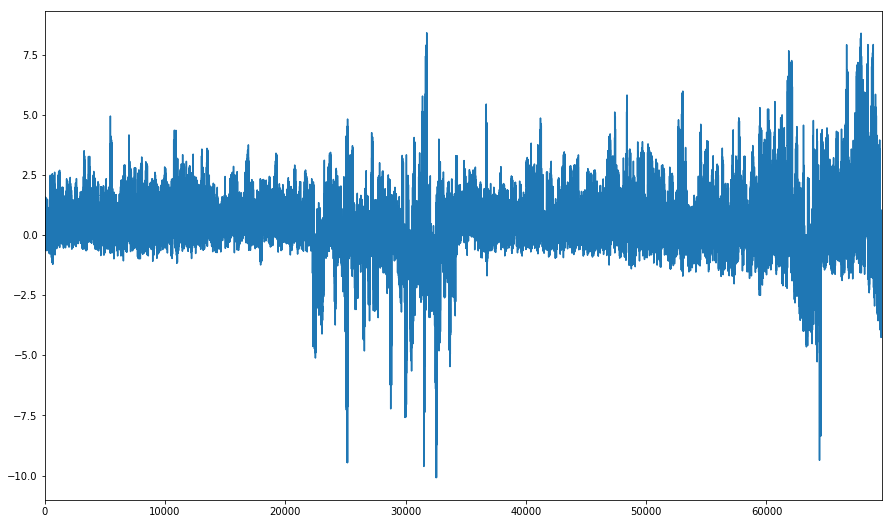

In [109]:
strategy_optimize_df["vwr"].plot()

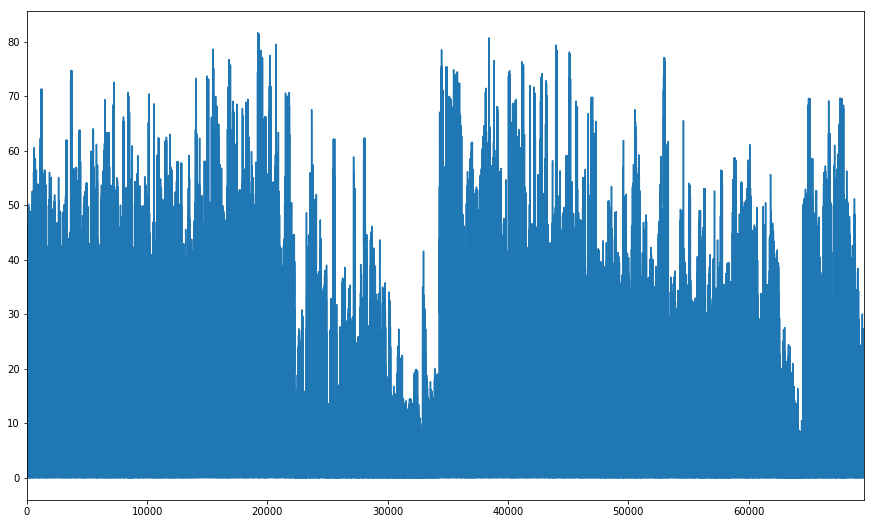

In [110]:
strategy_optimize_df["max_drowdown"].plot()

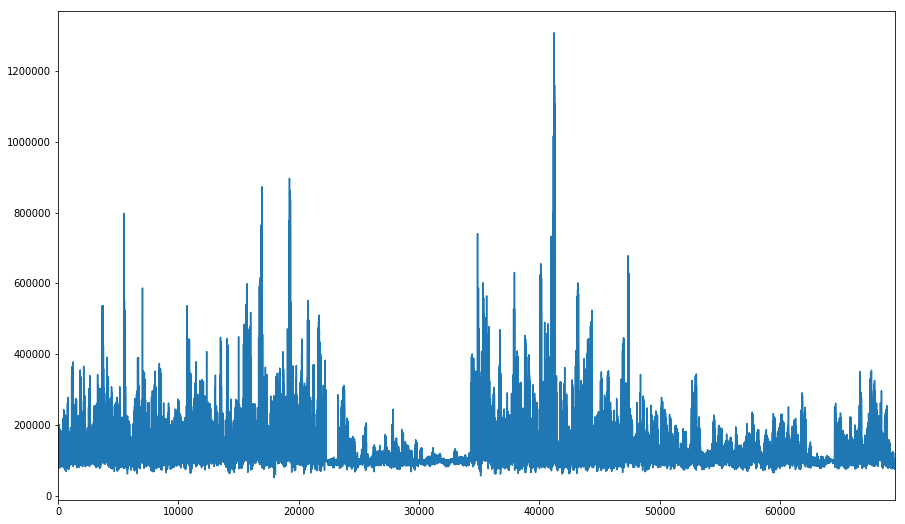

In [111]:
strategy_optimize_df["returns"].plot()

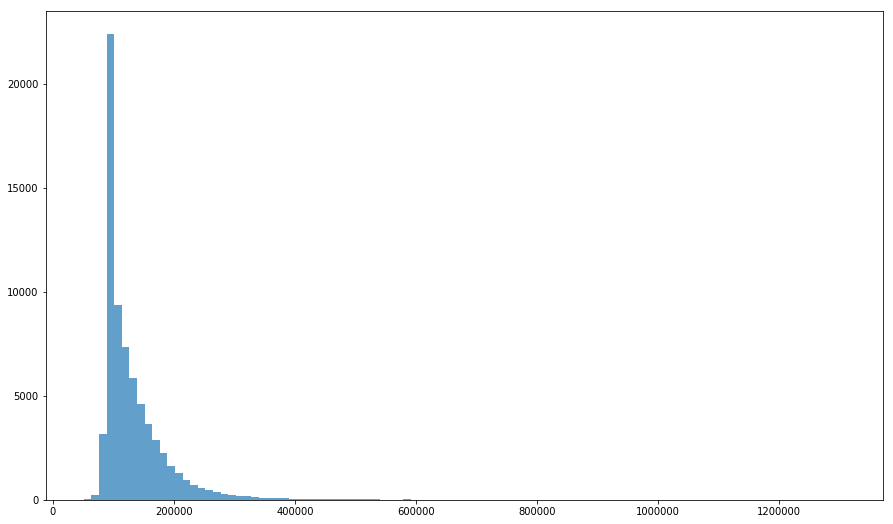

In [112]:
plt.figure()
plt.hist(strategy_optimize_df["returns"], bins = 100, alpha = 0.7)
plt.show()

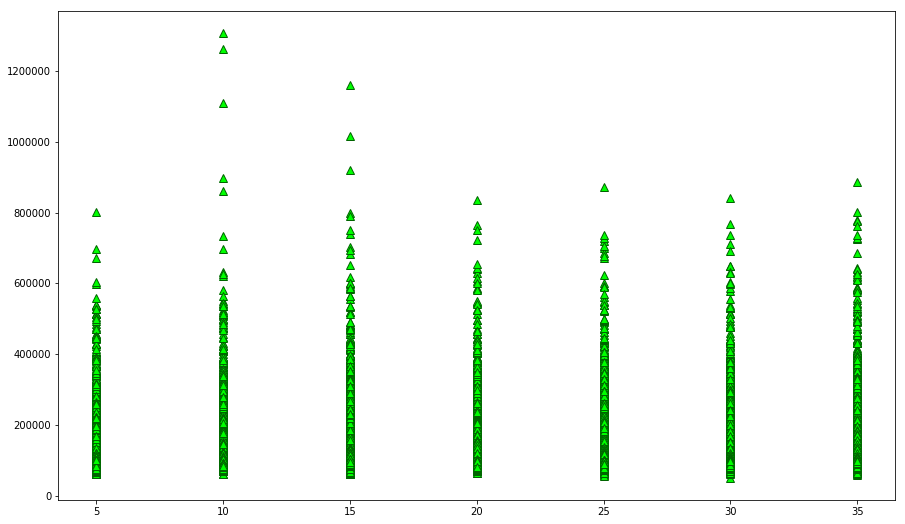

In [113]:
fig, ax = plt.subplots()

ax.plot(strategy_optimize_df["ma_period_short"].values, strategy_optimize_df["returns"].values, '^', color='lime',
        markeredgecolor='darkgreen', markersize=8, markeredgewidth=1)

plt.show()

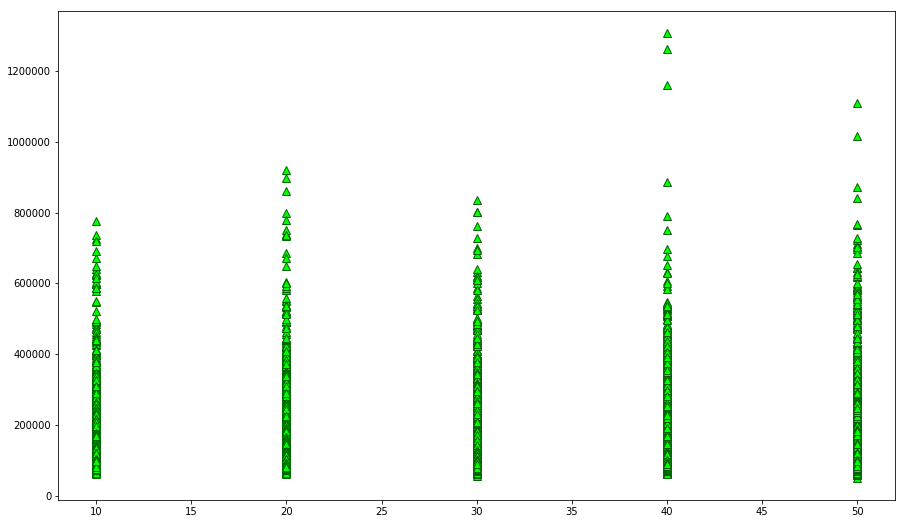

In [114]:
fig, ax = plt.subplots()

ax.plot(strategy_optimize_df["ma_period_middle"].values, strategy_optimize_df["returns"].values, '^', color='lime',
        markeredgecolor='darkgreen', markersize=8, markeredgewidth=1)

plt.show()

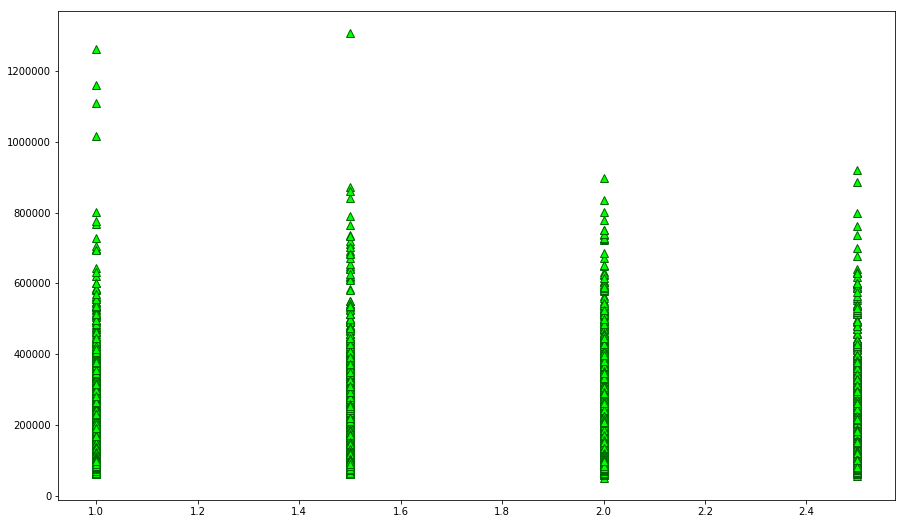

In [115]:
fig, ax = plt.subplots()

ax.plot(strategy_optimize_df["ma_period_long"].values, strategy_optimize_df["returns"].values, '^', color='lime',
        markeredgecolor='darkgreen', markersize=8, markeredgewidth=1)

plt.show()

In [116]:
m, n = (5, 3)
x = np.linspace(0, 1, m)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x,y)

In [117]:
Y

array([[0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. , 1. ]])

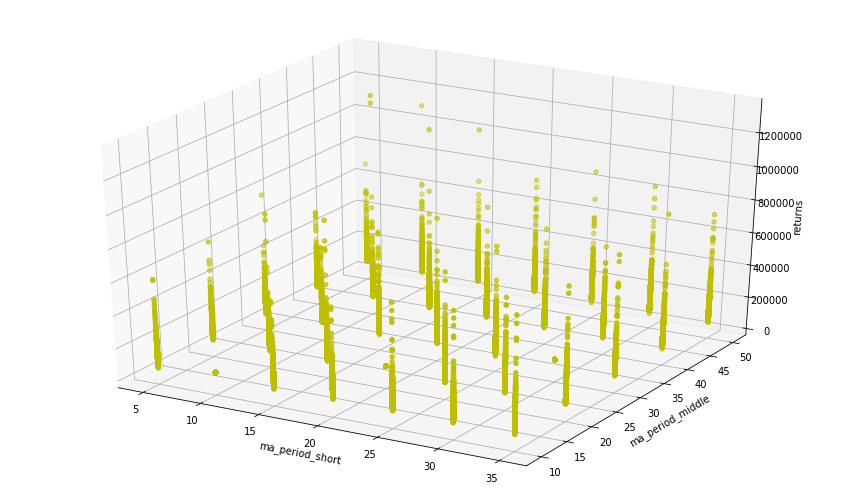

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(strategy_optimize_df["ma_period_short"].values,
            strategy_optimize_df["ma_period_middle"].values,
           strategy_optimize_df["returns"].values,
           c='y')  # 绘制数据点

ax.set_xlabel('ma_period_short')
ax.set_ylabel('ma_period_middle')
ax.set_zlabel('returns')  # 坐标轴


plt.show()


### 挑选参数

In [104]:
x = strategy_optimize_df[strategy_optimize_df.ma_period_short == 10]
x = x[x.ma_period_middle == 50]
x = x[x.ma_period_long == 70]
x

,code,ma_period_short,ma_period_middle,ma_period_long,sharperatio,vwr,sqn,max_drowdown_len,max_drowdown,returns
46,600006.csv,10,50,70,0.006851725826421334,0.541337,1.096239,3287.0,10.953628,120892.621229
135,600008.csv,10,50,70,-0.007113724926336941,0.471638,0.591114,1486.0,16.070312,116418.423859
224,600017.csv,10,50,70,-0.3306438149180662,-0.379319,-0.662168,1796.0,13.172754,92559.158164
313,600021.csv,10,50,70,0.34772442045507673,2.348286,1.319992,1762.0,20.569615,229056.226165
402,600022.csv,10,50,70,0.02064048092791957,0.632610,0.634510,1763.0,23.257762,115828.221655
491,600026.csv,10,50,70,0.19526651329640857,1.166789,1.027711,2321.0,13.055797,146911.562322
580,600037.csv,10,50,70,-0.025454925972316647,0.512658,1.194279,1259.0,15.383894,117086.733392
669,600039.csv,10,50,70,0.006054772042896735,0.542718,0.757187,2864.0,17.558580,115420.059863
758,600053.csv,10,50,70,-0.11799699832935703,0.128933,0.119960,2110.0,21.009167,103337.514148
847,600056.csv,10,50,70,0.04603040907741904,0.630296,1.393730,1249.0,12.998691,124832.395116


In [119]:
x = strategy_optimize_df[strategy_optimize_df.ma_period_short == 10]
x = x[x.ma_period_middle == 40]
x = x[x.ma_period_long == 1]
x

,code,ma_period_short,ma_period_middle,ma_period_long,sharperatio,vwr,sqn,max_drowdown_len,max_drowdown,returns
52,600006.csv,10,40,1.0,-0.1823370096380022,-0.022694,-0.024023,1703.0,21.198087,99415.377027
192,600008.csv,10,40,1.0,0.12076373501289031,0.882503,0.862115,1377.0,19.728014,138047.502165
332,600017.csv,10,40,1.0,-0.09244679841652768,0.226675,0.339117,1819.0,18.481474,104364.082125
472,600021.csv,10,40,1.0,-0.8402841312301899,-0.483193,-1.347963,3562.0,15.743942,87950.223535
612,600022.csv,10,40,1.0,0.33112017454328246,1.993605,1.292753,906.0,25.369209,179567.327411
752,600026.csv,10,40,1.0,-0.08909584886696517,0.263971,0.381693,1813.0,24.078346,106918.880355
892,600037.csv,10,40,1.0,0.08423482580669091,0.746465,0.653257,1134.0,34.795133,128044.180709
1032,600039.csv,10,40,1.0,0.012743563350403013,0.495934,0.558767,2868.0,20.361441,113807.821916
1172,600053.csv,10,40,1.0,0.05907398574836349,0.675917,0.564637,2590.0,33.864366,128539.451518
1312,600056.csv,10,40,1.0,0.1765026052318489,0.931219,1.421848,1725.0,21.443239,149670.949542


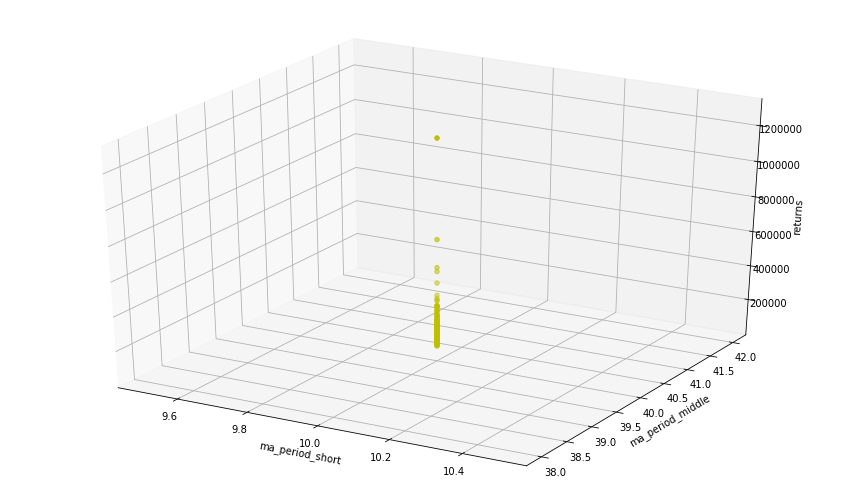

In [120]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

ax = plt.subplot(111, projection='3d')  # 创建一个三维的绘图工程
#  将数据点分成三部分画，在颜色上有区分度
ax.scatter(x["ma_period_short"].values,
            x["ma_period_middle"].values,
           x["returns"].values,
           c='y')  # 绘制数据点

ax.set_xlabel('ma_period_short')
ax.set_ylabel('ma_period_middle')
ax.set_zlabel('returns')  # 坐标轴


plt.show()
